In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,  # Adjust as needed
    seasonality_mode='multiplicative',  # or 'additive'
    holidays=None,  # Include holidays if relevant
)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('ETH-USD Price Forecast')
plt.xlabel('Date')
plt.ylabel('ETH-USD Price')
plt.show()


ModuleNotFoundError: No module named 'prophet'

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Load the dataset
# file_path = "ETH-USD.csv"
# df = pd.read_csv(file_path)
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # Use the 'Close' prices as the target variable
# ts = df['Close']

# # Split the data into training and testing sets
# train_size = int(len(ts) * 0.8)
# train, test = ts[:train_size], ts[train_size:]

# # Fit a SARIMA model with seasonal differencing
# order = (1, 1, 1)  # Non-seasonal order (p, d, q)
# seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, s)
# model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
# fit_model = model.fit(disp=False)

# # Forecast future values
# forecast_steps = len(test)
# forecast = fit_model.get_forecast(steps=forecast_steps)
# forecast_values = forecast.predicted_mean
# conf_int = forecast.conf_int()

# # Plot the results
# plt.figure(figsize=(12, 6))
# plt.plot(train.index, train, label='Training Data')
# plt.plot(test.index, test, label='Test Data')
# plt.plot(test.index, forecast_values, label='SARIMA Forecast', color='red')
# plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2, label='Confidence Interval')
# plt.title('ETH-USD Price Forecast using SARIMA')
# plt.xlabel('Date')
# plt.ylabel('ETH-USD Price')
# plt.legend()
# plt.show()


00:43:39 - cmdstanpy - INFO - Chain [1] start processing
00:43:39 - cmdstanpy - INFO - Chain [1] done processing


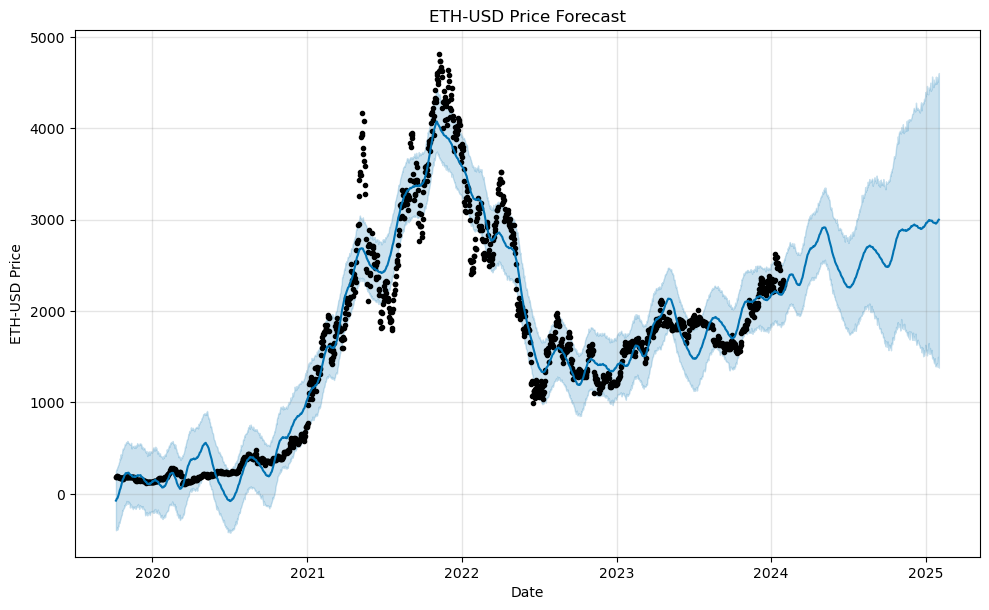

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('ETH-USD Price Forecast')
plt.xlabel('Date')
plt.ylabel('ETH-USD Price')
plt.show()


23:50:51 - cmdstanpy - INFO - Chain [1] start processing
23:50:51 - cmdstanpy - INFO - Chain [1] done processing


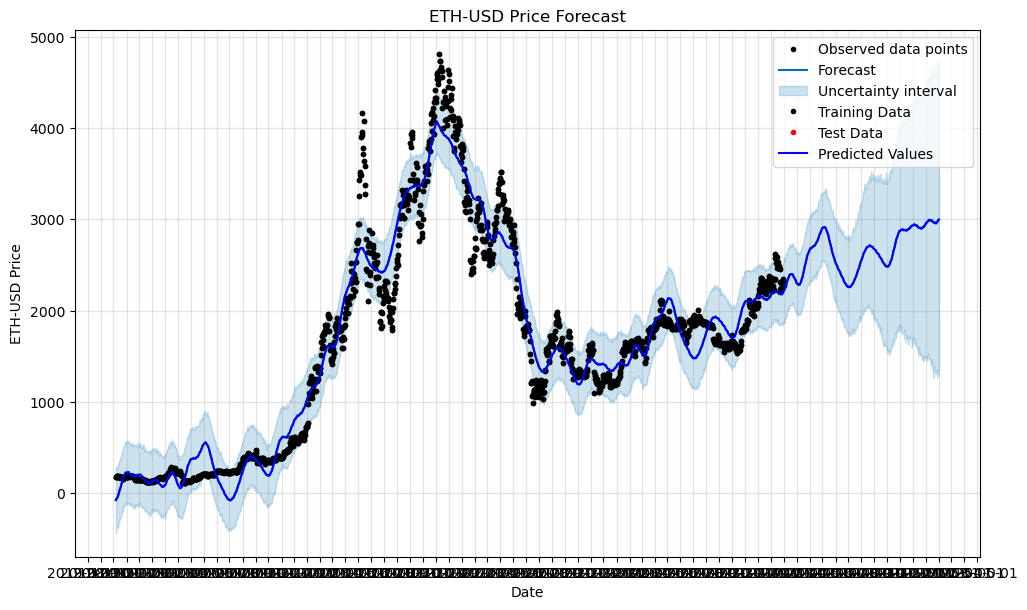

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Extracting training data
train_mask = (df['ds'] >= df['ds'].min()) & (df['ds'] <= df['ds'].max())
train_data = df.loc[train_mask]

# Extracting test data
test_mask = (df['ds'] > df['ds'].max())
test_data = df.loc[test_mask]

# Plot the forecast with more complete date system and additional information
fig = model.plot(forecast)
plt.title('ETH-USD Price Forecast')
plt.xlabel('Date')
plt.ylabel('ETH-USD Price')

# Plotting training data
plt.plot(train_data['ds'], train_data['y'], 'k.', label='Training Data')

# Plotting test data
plt.plot(test_data['ds'], test_data['y'], 'r.', label='Test Data')

# Plotting actual vs. predicted values
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Adjust x-axis date formatting for more complete system
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Show legend
plt.legend()

plt.show()


00:04:25 - cmdstanpy - INFO - Chain [1] start processing
00:04:25 - cmdstanpy - INFO - Chain [1] done processing


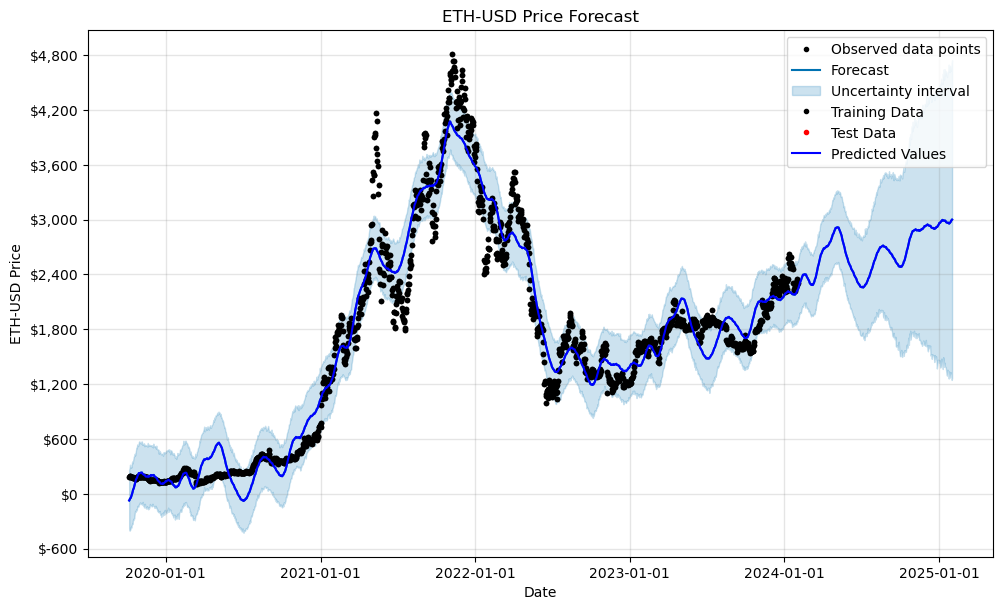

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Extracting training data
train_mask = (df['ds'] >= df['ds'].min()) & (df['ds'] <= df['ds'].max())
train_data = df.loc[train_mask]

# Extracting test data
test_mask = (df['ds'] > df['ds'].max())
test_data = df.loc[test_mask]

# Plot the forecast with adjusted date and y-axis settings
fig = model.plot(forecast)
plt.title('ETH-USD Price Forecast')
plt.xlabel('Date')
plt.ylabel('ETH-USD Price')

# Plotting training data
plt.plot(train_data['ds'], train_data['y'], 'k.', label='Training Data')

# Plotting test data
plt.plot(test_data['ds'], test_data['y'], 'r.', label='Test Data')

# Plotting actual vs. predicted values
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Adjust x-axis date formatting for more complete system
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust y-axis settings for better precision
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Show legend
plt.legend()

plt.show()


00:01:46 - cmdstanpy - INFO - Chain [1] start processing
00:01:47 - cmdstanpy - INFO - Chain [1] done processing


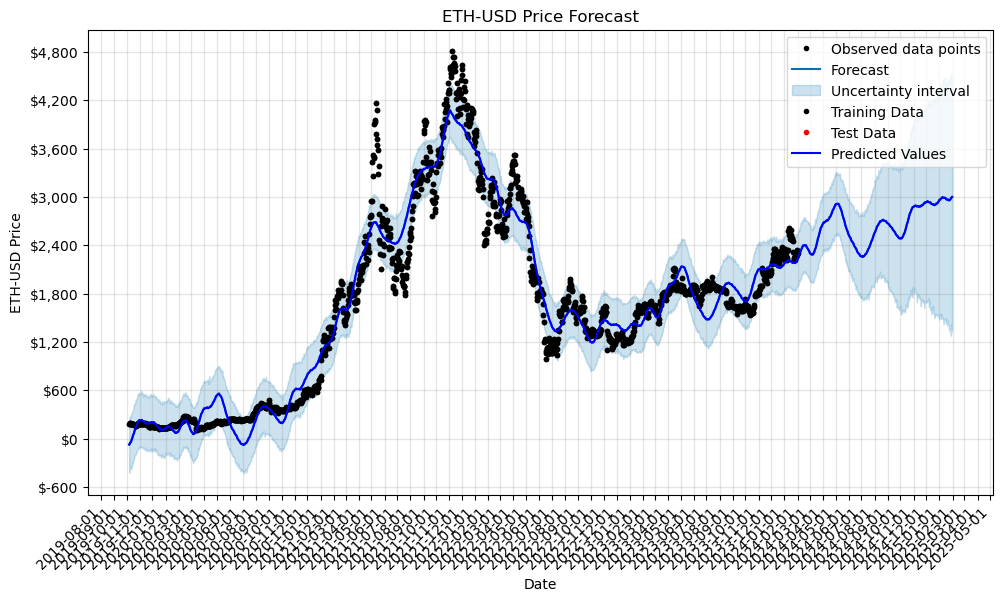

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Extracting training data
train_mask = (df['ds'] >= df['ds'].min()) & (df['ds'] <= df['ds'].max())
train_data = df.loc[train_mask]

# Extracting test data
test_mask = (df['ds'] > df['ds'].max())
test_data = df.loc[test_mask]

# Plot the forecast with adjusted date and y-axis settings
fig = model.plot(forecast)
plt.title('ETH-USD Price Forecast')
plt.xlabel('Date')
plt.ylabel('ETH-USD Price')

# Plotting training data
plt.plot(train_data['ds'], train_data['y'], 'k.', label='Training Data')

# Plotting test data
plt.plot(test_data['ds'], test_data['y'], 'r.', label='Test Data')

# Plotting actual vs. predicted values
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Adjust x-axis date formatting for more complete system
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust rotation of x-axis labels for better visibility
plt.gcf().autofmt_xdate(rotation=45)

# Adjust y-axis settings for better precision
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Show legend
plt.legend()

plt.show()


00:12:47 - cmdstanpy - INFO - Chain [1] start processing
00:12:47 - cmdstanpy - INFO - Chain [1] done processing


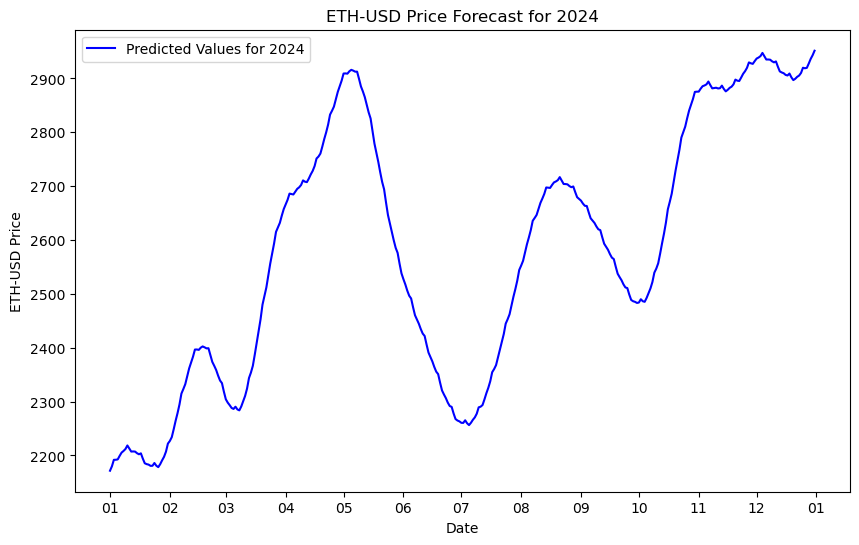

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Filter the forecast for the year 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024]

# Plot only the predictions for 2024
fig = plt.figure(figsize=(10, 6))
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], color='blue', label='Predicted Values for 2024')
plt.title('ETH-USD Price Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('ETH-USD Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.legend()
plt.show()


In [ ]:
# Extract the actual values for 2024 from the original dataset
actual_2024 = df[df['ds'].dt.year == 2024]['y']

# Ensure that actual_2024 and predicted_2024 have the same length
min_length = min(len(actual_2024), len(predicted_2024))
actual_2024 = actual_2024.head(min_length)
predicted_2024 = predicted_2024.head(min_length)

# Continue with the calculation of evaluation metrics
mae_2024 = mean_absolute_error(actual_2024, predicted_2024)
mse_2024 = mean_squared_error(actual_2024, predicted_2024)
rmse_2024 = np.sqrt(mse_2024)
mape_2024 = mean_absolute_percentage_error(actual_2024, predicted_2024)

print(f'Mean Absolute Error (MAE) for 2024: {mae_2024}')
print(f'Mean Squared Error (MSE) for 2024: {mse_2024}')
print(f'Root Mean Squared Error (RMSE) for 2024: {rmse_2024}')
print(f'Mean Absolute Percentage Error (MAPE) for 2024: {mape_2024}%')



Mean Absolute Error (MAE) for 2024: 175.834185401505
Mean Squared Error (MSE) for 2024: 46008.53419783125
Root Mean Squared Error (RMSE) for 2024: 214.49600042385697
Mean Absolute Percentage Error (MAPE) for 2024: 7.161962551726619%


21:42:17 - cmdstanpy - INFO - Chain [1] start processing
21:42:18 - cmdstanpy - INFO - Chain [1] done processing


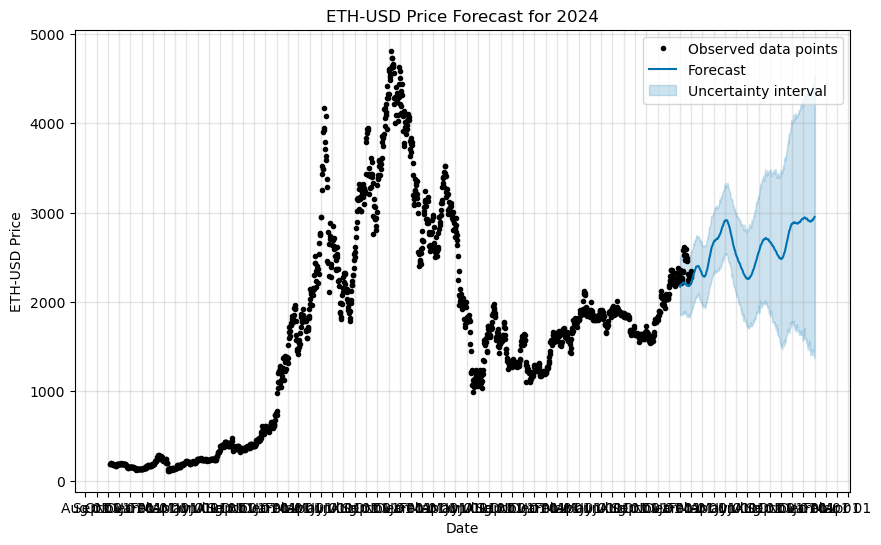

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Filter the forecast for the year 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024]

# Plot the forecast for 2024
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast_2024, ax=ax)
ax.set_title('ETH-USD Price Forecast for 2024')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
plt.legend()
plt.show()


21:45:12 - cmdstanpy - INFO - Chain [1] start processing
21:45:12 - cmdstanpy - INFO - Chain [1] done processing


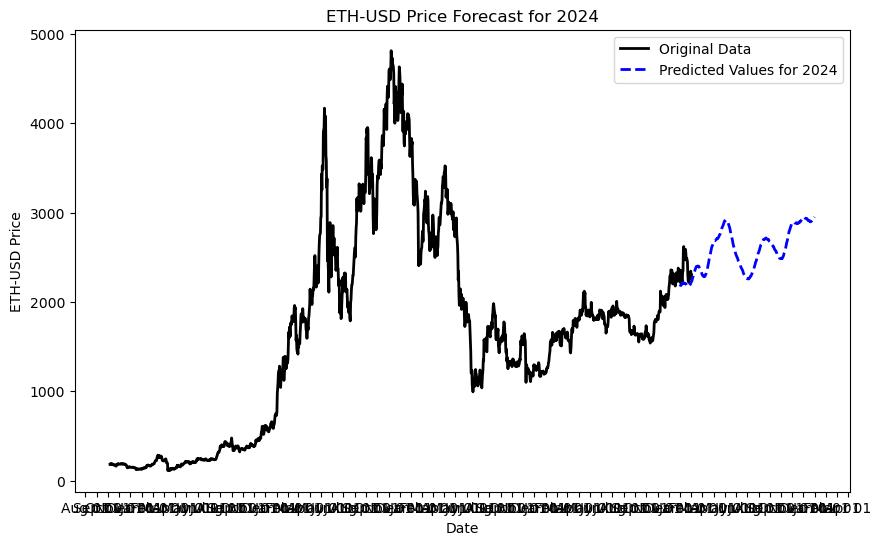

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Filter the forecast for the year 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024]

# Plot the original data and forecast for 2024
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data
ax.plot(df['ds'], df['y'], label='Original Data', color='black', linestyle='-', linewidth=2)

# Plot predicted values for 2024
ax.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Predicted Values for 2024', color='blue', linestyle='--', linewidth=2)

ax.set_title('ETH-USD Price Forecast for 2024')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
plt.legend()
plt.show()


21:58:00 - cmdstanpy - INFO - Chain [1] start processing
21:58:01 - cmdstanpy - INFO - Chain [1] done processing


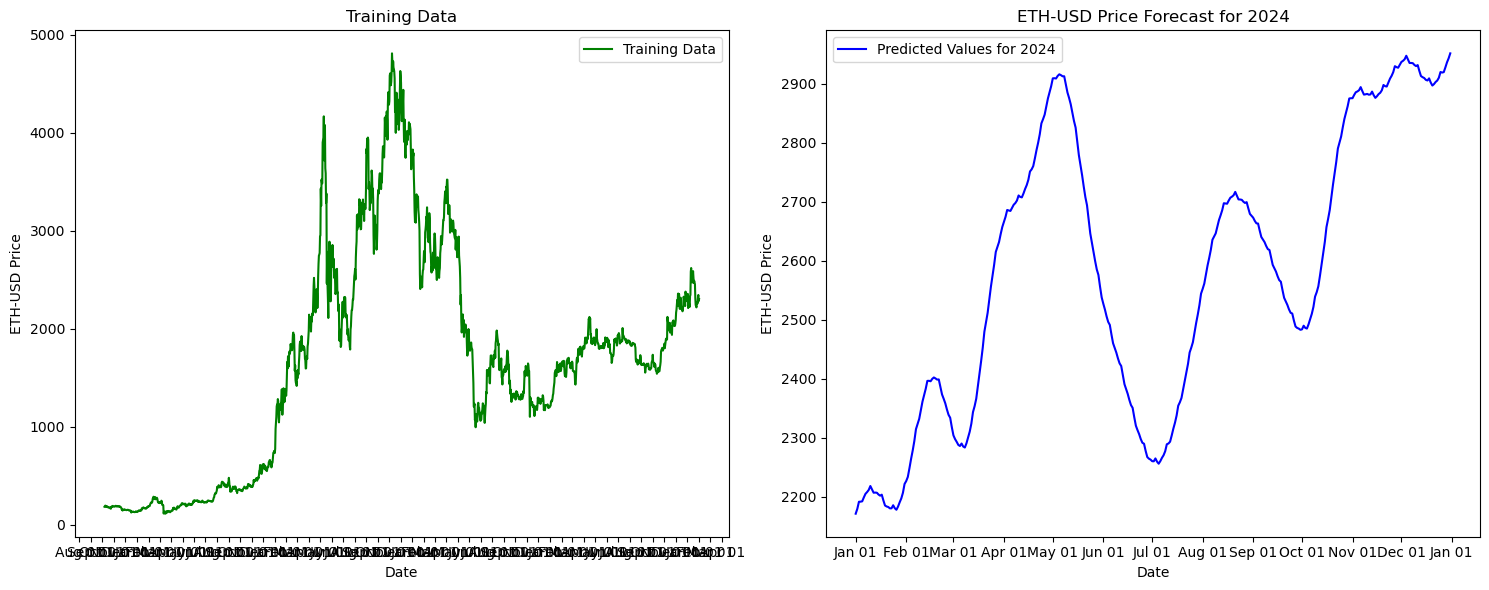

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Filter the forecast for the year 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024]

# Plot the training data and predictions side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot training data
axes[0].plot(df['ds'], df['y'], color='green', label='Training Data')
axes[0].set_title('Training Data')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('ETH-USD Price')
axes[0].xaxis.set_major_locator(MonthLocator())
axes[0].xaxis.set_major_formatter(DateFormatter('%b %d'))
axes[0].legend()

# Plot predictions for 2024
axes[1].plot(forecast_2024['ds'], forecast_2024['yhat'], color='blue', label='Predicted Values for 2024')
axes[1].set_title('ETH-USD Price Forecast for 2024')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('ETH-USD Price')
axes[1].xaxis.set_major_locator(MonthLocator())
axes[1].xaxis.set_major_formatter(DateFormatter('%b %d'))
axes[1].legend()

plt.tight_layout()
plt.show()


22:07:37 - cmdstanpy - INFO - Chain [1] start processing
22:07:38 - cmdstanpy - INFO - Chain [1] done processing


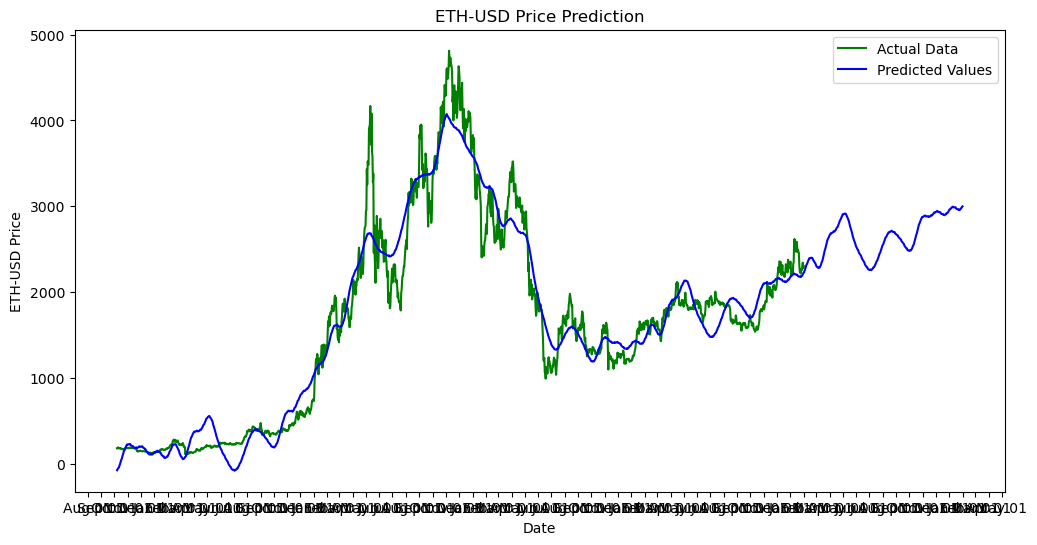

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the entire dataset with predictions
fig, ax = plt.subplots(figsize=(12, 6))

# Plot training data
ax.plot(df['ds'], df['y'], color='green', label='Actual Data')

# Plot predictions
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

ax.set_title('ETH-USD Price Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


23:46:10 - cmdstanpy - INFO - Chain [1] start processing
23:46:11 - cmdstanpy - INFO - Chain [1] done processing


Actual Value on 2024-01-01 00:00:00: 2352.33
Predicted Value on 2024-01-01 00:00:00: 2171.65
Error: 180.68


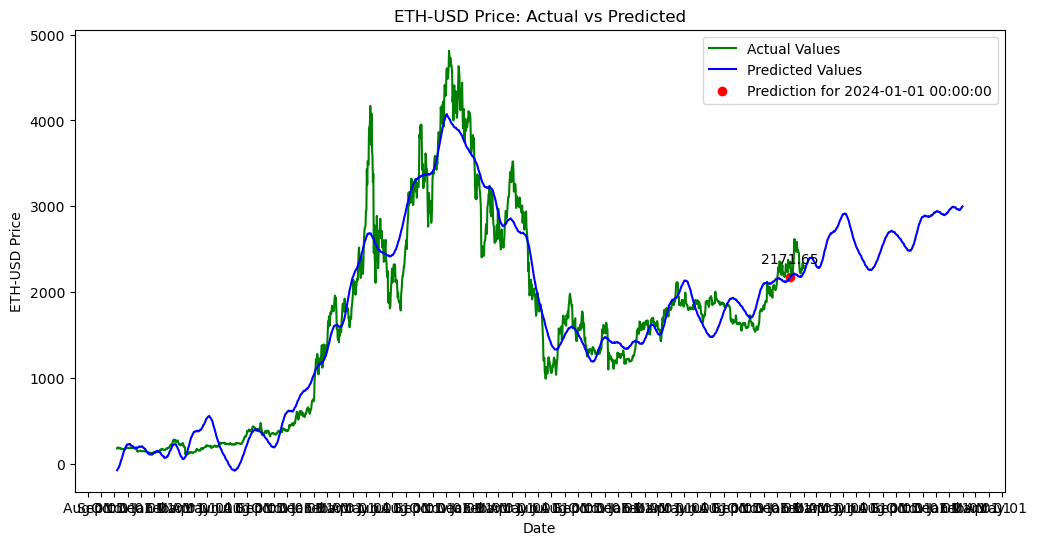

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Choose a specific date for prediction (replace with your desired date)
specific_date = pd.to_datetime("2024-01-01")

# Filter the forecast for the specific date
forecast_specific_date = forecast[forecast['ds'] == specific_date]

# Extract the predicted and actual values
predicted_value = forecast_specific_date['yhat'].values[0]
actual_value = df[df['ds'] == specific_date]['y'].values[0]

# Calculate the absolute error
error = abs(predicted_value - actual_value)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Highlight the specific date and predicted value
ax.scatter(specific_date, predicted_value, color='red', label='Prediction for {}'.format(specific_date))
ax.annotate(f'{predicted_value:.2f}', (specific_date, predicted_value), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

# Print the actual and predicted values, as well as the error
print(f"Actual Value on {specific_date}: {actual_value:.2f}")
print(f"Predicted Value on {specific_date}: {predicted_value:.2f}")
print(f"Error: {error:.2f}")

plt.show()


22:55:48 - cmdstanpy - INFO - Chain [1] start processing
22:55:49 - cmdstanpy - INFO - Chain [1] done processing


Predicted Value on 2024-03-03 00:00:00: 2293.36


NameError: name 'actual_value' is not defined

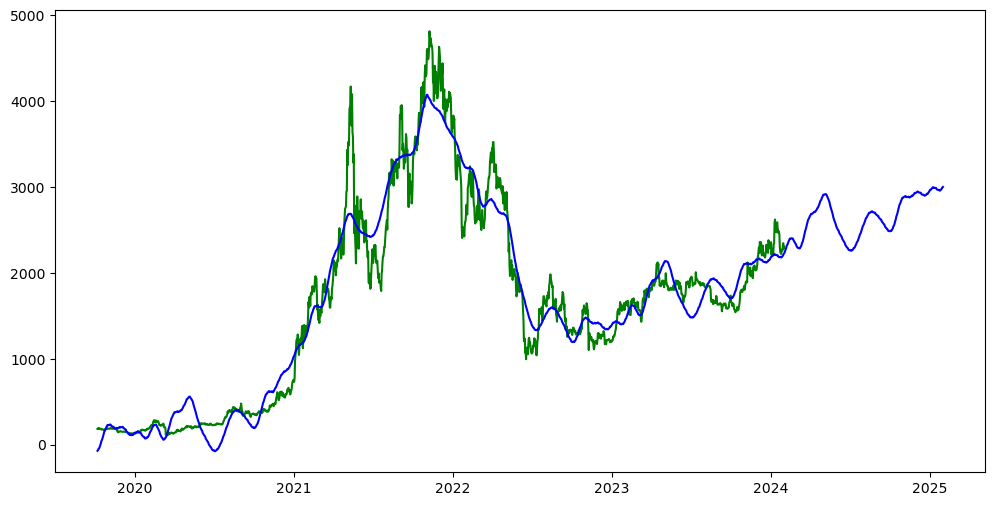

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Choose a specific date for prediction (replace with your desired date in the future)
specific_date = pd.to_datetime("2024-03-03")

# Filter the forecast for the specific date
forecast_specific_date = forecast[forecast['ds'] == specific_date]

# Extract the predicted value
predicted_value = forecast_specific_date['yhat'].values[0]

# Print the predicted value and date
print(f"Predicted Value on {specific_date}: {predicted_value:.2f}")

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

error = abs(predicted_value - actual_value)
print(f"Error: {error:.2f}")
# Highlight the specific date and predicted value
ax.scatter(specific_date, predicted_value, color='red', label='Prediction for {}'.format(specific_date))
ax.annotate(f'{predicted_value:.2f}', (specific_date, predicted_value), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


20:56:32 - cmdstanpy - INFO - Chain [1] start processing
20:56:32 - cmdstanpy - INFO - Chain [1] done processing


Predicted Value on 2024-01-03 00:00:00: 2191.87


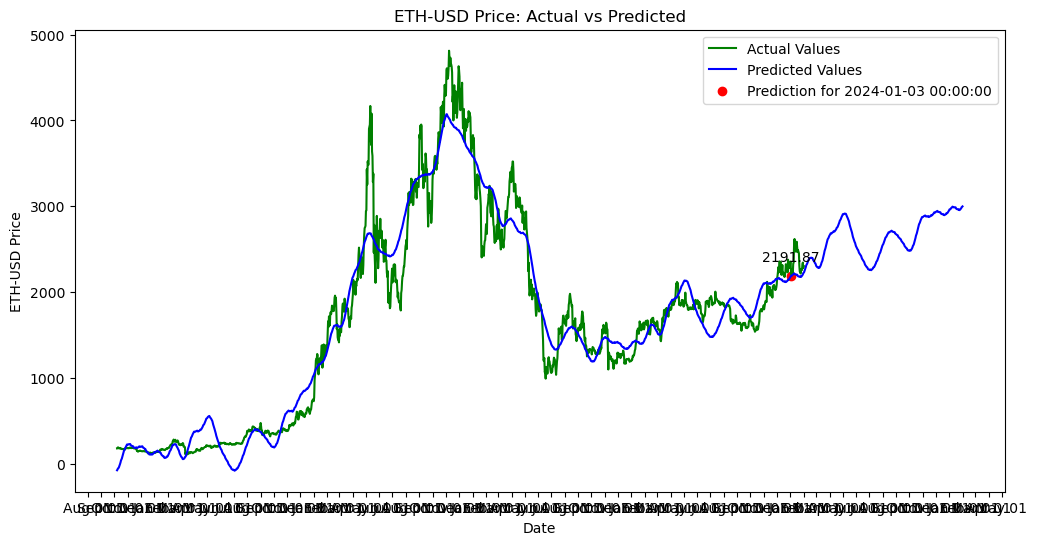

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Choose a specific date for prediction (replace with your desired date)
specific_date = pd.to_datetime("2024-01-03")

# Filter the forecast for the specific date
forecast_specific_date = forecast[forecast['ds'] == specific_date]

# Extract the predicted and actual values
predicted_value = forecast_specific_date['yhat'].values[0]
actual_value = df[df['ds'] == specific_date]['y'].values[0]

# Calculate the absolute error
error = abs(predicted_value - actual_value)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Highlight the specific date and predicted value
ax.scatter(specific_date, predicted_value, color='red', label='Prediction for {}'.format(specific_date))
ax.annotate(f'{predicted_value:.2f}', (specific_date, predicted_value), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

# Print the actual and predicted values, as well as the error
# print(f"Actual Value on {specific_date}: {actual_value:.2f}")
print(f"Predicted Value on {specific_date}: {predicted_value:.2f}")
# print(f"Error: {error:.2f}")

plt.show()

23:24:30 - cmdstanpy - INFO - Chain [1] start processing
23:24:31 - cmdstanpy - INFO - Chain [1] done processing


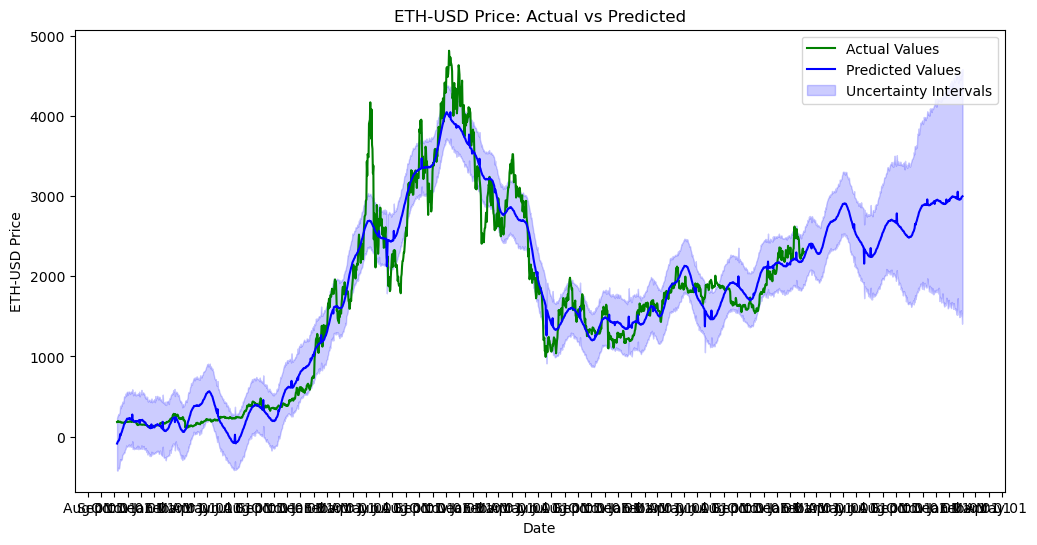

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.05,  # Adjust the strength of the trend flexibility
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    holidays_prior_scale=10,  # Adjust the impact of holidays
    seasonality_prior_scale=10  # Adjust the strength of seasonality
)
model.add_country_holidays(country_name='US')  # Add US holidays (adjust based on your country)

model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


22:50:17 - cmdstanpy - INFO - Chain [1] start processing
22:50:17 - cmdstanpy - INFO - Chain [1] done processing


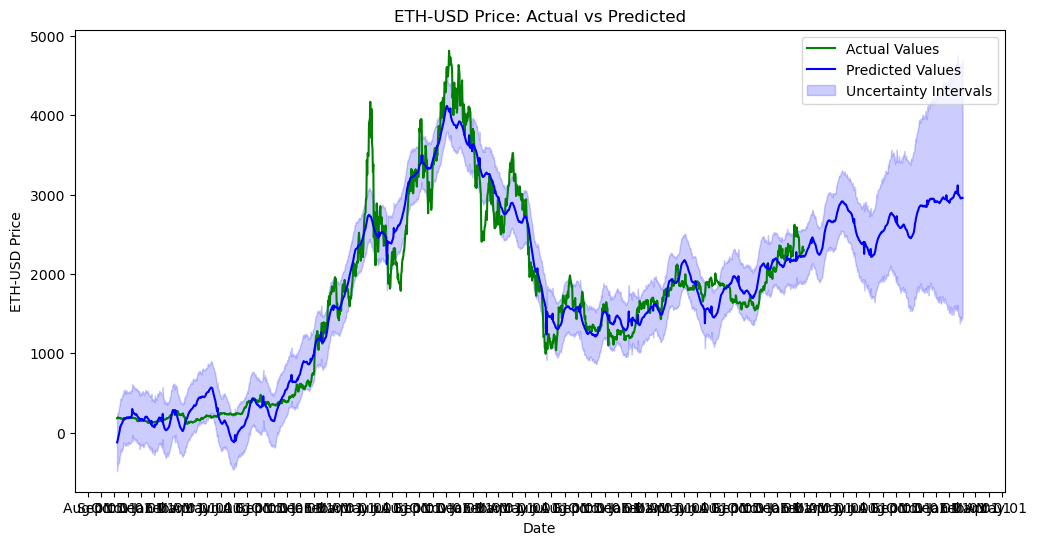

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.05,  # Adjust the strength of the trend flexibility
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    daily_seasonality=False,  # Disable daily seasonality
    holidays_prior_scale=20,  # Adjust the impact of holidays
    seasonality_prior_scale=15  # Adjust the strength of seasonality
)

# Add holidays
model.add_country_holidays(country_name='US')
model.add_seasonality(name='crypto_seasonality', period=30, fourier_order=5)  # Add extra seasonality (adjust period and order)

model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


23:02:20 - cmdstanpy - INFO - Chain [1] start processing
23:02:21 - cmdstanpy - INFO - Chain [1] done processing


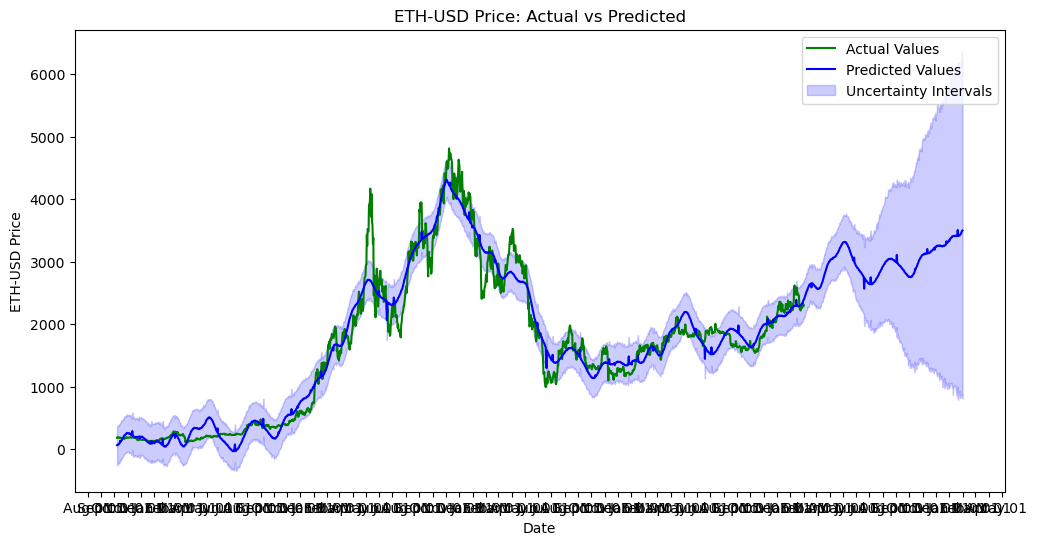

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.1,  # Adjust the flexibility of trend adjustment
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    daily_seasonality=False,  # Disable daily seasonality
    holidays_prior_scale=20,  # Adjust the impact of holidays
    seasonality_prior_scale=15,  # Adjust the strength of seasonality
    seasonality_mode='additive'  # Additive seasonality (default)
)

# Add holidays
model.add_country_holidays(country_name='US')

model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


22:27:28 - cmdstanpy - INFO - Chain [1] start processing
22:27:29 - cmdstanpy - INFO - Chain [1] done processing


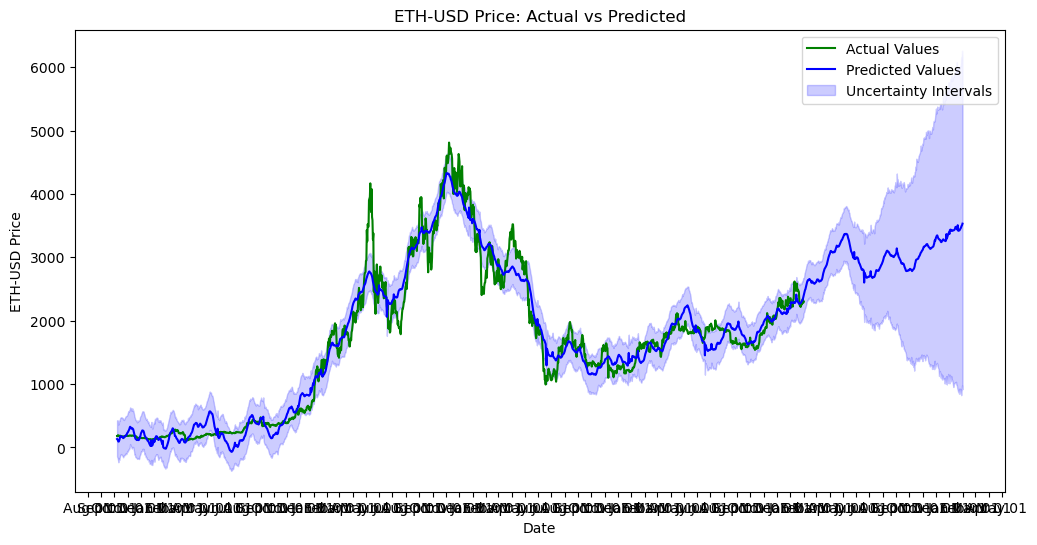

Mean Absolute Error (MAE): 172.0514161223034
Mean Squared Error (MSE): 53416.36366015679
Root Mean Squared Error (RMSE): 231.11980369530602


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.1,  # Adjust the flexibility of trend adjustment
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    daily_seasonality=False,  # Disable daily seasonality
    holidays_prior_scale=20,  # Adjust the impact of holidays
    seasonality_prior_scale=15,  # Adjust the strength of seasonality
    seasonality_mode='additive'  # Additive seasonality (default)
)

# Add holidays
model.add_country_holidays(country_name='US')

# Add extra seasonality components
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # Monthly seasonality
model.add_seasonality(name='quarterly', period=365.25 / 4, fourier_order=10)  # Quarterly seasonality

model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Align actual and predicted values based on overlapping dates
merged_df = pd.merge(df[['ds', 'y']], forecast[['ds', 'yhat']], on='ds', how='inner')

# Extract aligned actual and predicted values
actual_values = merged_df['y'].values
predicted_values = merged_df['yhat'].values

# Calculate metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



22:01:11 - cmdstanpy - INFO - Chain [1] start processing
22:01:13 - cmdstanpy - INFO - Chain [1] done processing


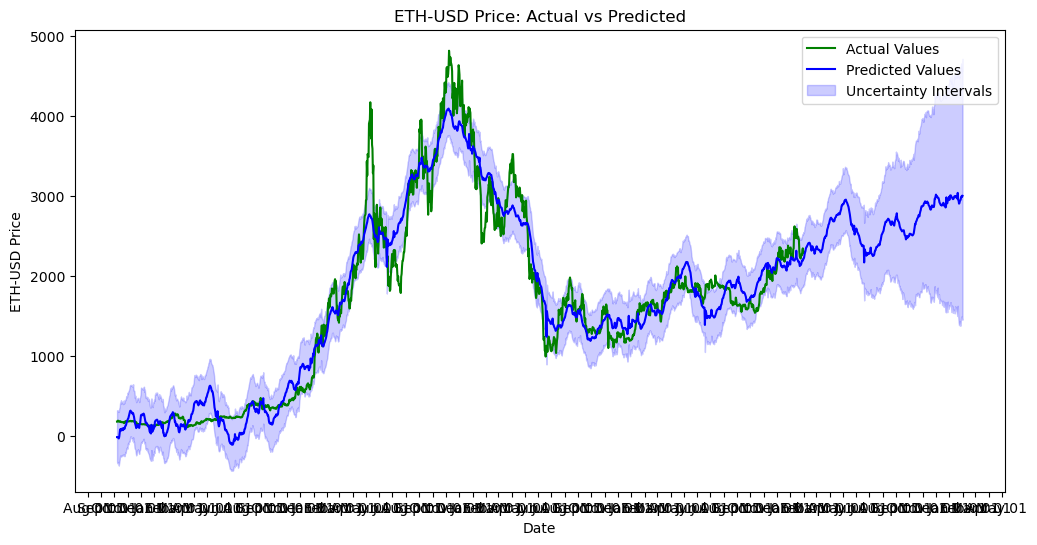

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.05,  # Adjust the flexibility of trend adjustment
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    daily_seasonality=False,  # Disable daily seasonality
    holidays_prior_scale=30,  # Increase the impact of holidays
    seasonality_prior_scale=20,  # Adjust the strength of seasonality
    seasonality_mode='additive'  # Additive seasonality (default)
)

# Add holidays
model.add_country_holidays(country_name='US')

# Add extra seasonality components
model.add_seasonality(name='monthly', period=30.5, fourier_order=10)  # Monthly seasonality
model.add_seasonality(name='quarterly', period=365.25 / 4, fourier_order=15)  # Quarterly seasonality

model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


23:02:59 - cmdstanpy - INFO - Chain [1] start processing
23:03:00 - cmdstanpy - INFO - Chain [1] done processing


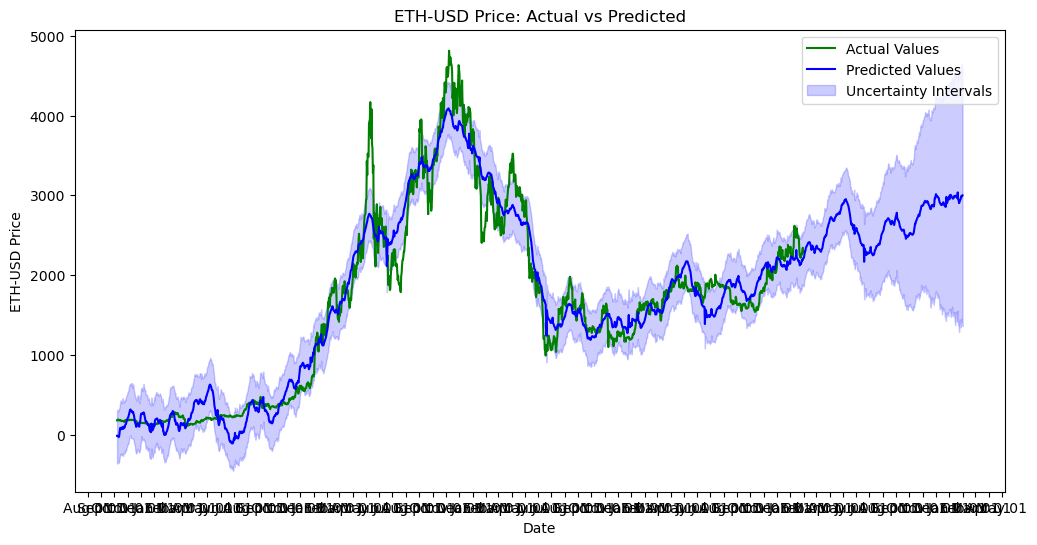

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.05,  # Adjust the flexibility of trend adjustment
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    daily_seasonality=False,  # Disable daily seasonality
    holidays_prior_scale=30,  # Increase the impact of holidays
    seasonality_prior_scale=20,  # Adjust the strength of seasonality
    seasonality_mode='additive'  # Additive seasonality (default)
)

# Add holidays
model.add_country_holidays(country_name='US')

# Add extra seasonality components
model.add_seasonality(name='monthly', period=30.5, fourier_order=10)  # Monthly seasonality
model.add_seasonality(name='quarterly', period=365.25 / 4, fourier_order=15)  # Quarterly seasonality

model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()



22:18:24 - cmdstanpy - INFO - Chain [1] start processing
22:18:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

22:18:27 - cmdstanpy - INFO - Chain [1] start processing
22:18:28 - cmdstanpy - INFO - Chain [1] done processing
22:18:29 - cmdstanpy - INFO - Chain [1] start processing
22:18:30 - cmdstanpy - INFO - Chain [1] done processing
22:18:32 - cmdstanpy - INFO - Chain [1] start processing
22:18:33 - cmdstanpy - INFO - Chain [1] done processing


     horizon           mse         rmse          mae      mape     mdape  \
0    37 days  1.809072e+05   425.331909   392.292316  0.198643  0.189538   
1    38 days  1.855133e+05   430.712589   396.118935  0.201434  0.190277   
2    39 days  1.890742e+05   434.826665   399.465372  0.204260  0.199533   
3    40 days  1.934514e+05   439.831085   402.316688  0.207067  0.203882   
4    41 days  1.941607e+05   440.636716   402.039220  0.208654  0.203882   
..       ...           ...          ...          ...       ...       ...   
324 361 days  8.652544e+06  2941.520694  2688.861640  1.479860  1.288264   
325 362 days  8.617396e+06  2935.540228  2682.257401  1.471643  1.288264   
326 363 days  8.586729e+06  2930.312078  2676.845201  1.463530  1.160664   
327 364 days  8.550399e+06  2924.106596  2670.531944  1.455182  1.160664   
328 365 days  8.503745e+06  2916.118173  2662.601835  1.446880  1.160664   

        smape  coverage  
0    0.214209  0.400612  
1    0.218285  0.406728  
2    0.22

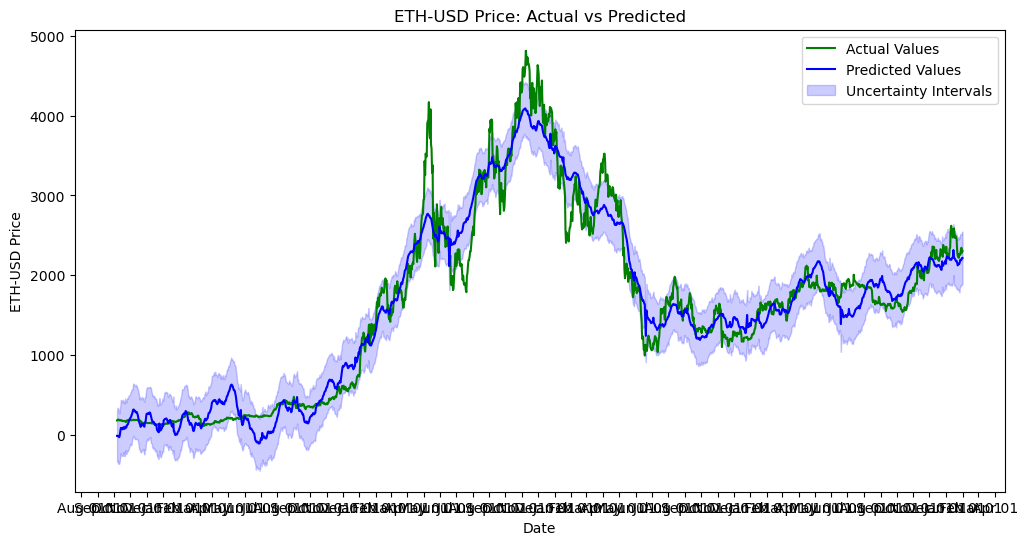

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.05,  # Adjust the flexibility of trend adjustment
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    daily_seasonality=False,  # Disable daily seasonality
    holidays_prior_scale=30,  # Increase the impact of holidays
    seasonality_prior_scale=20,  # Adjust the strength of seasonality
    seasonality_mode='additive'  # Additive seasonality (default)
)

# Add holidays
model.add_country_holidays(country_name='US')

# Add extra seasonality components
model.add_seasonality(name='monthly', period=30.5, fourier_order=10)  # Monthly seasonality
model.add_seasonality(name='quarterly', period=365.25 / 4, fourier_order=15)  # Quarterly seasonality

model.fit(df)

# Perform cross-validation
from prophet.diagnostics import cross_validation
cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calculate performance metrics
from prophet.diagnostics import performance_metrics
performance = performance_metrics(cv_results)

# Print performance metrics
print(performance)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
forecast = model.predict(df)
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


23:20:26 - cmdstanpy - INFO - Chain [1] start processing
23:20:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

23:20:27 - cmdstanpy - INFO - Chain [1] start processing
23:20:28 - cmdstanpy - INFO - Chain [1] done processing
23:20:29 - cmdstanpy - INFO - Chain [1] start processing
23:20:29 - cmdstanpy - INFO - Chain [1] done processing
23:20:30 - cmdstanpy - INFO - Chain [1] start processing
23:20:31 - cmdstanpy - INFO - Chain [1] done processing


     horizon           mse         rmse          mae      mape     mdape  \
0    37 days  1.809072e+05   425.331909   392.292316  0.198643  0.189538   
1    38 days  1.855133e+05   430.712589   396.118935  0.201434  0.190277   
2    39 days  1.890742e+05   434.826665   399.465372  0.204260  0.199533   
3    40 days  1.934514e+05   439.831085   402.316688  0.207067  0.203882   
4    41 days  1.941607e+05   440.636716   402.039220  0.208654  0.203882   
..       ...           ...          ...          ...       ...       ...   
324 361 days  8.652544e+06  2941.520694  2688.861640  1.479860  1.288264   
325 362 days  8.617396e+06  2935.540228  2682.257401  1.471643  1.288264   
326 363 days  8.586729e+06  2930.312078  2676.845201  1.463530  1.160664   
327 364 days  8.550399e+06  2924.106596  2670.531944  1.455182  1.160664   
328 365 days  8.503745e+06  2916.118173  2662.601835  1.446880  1.160664   

        smape  coverage  
0    0.214209  0.400612  
1    0.218285  0.406728  
2    0.22

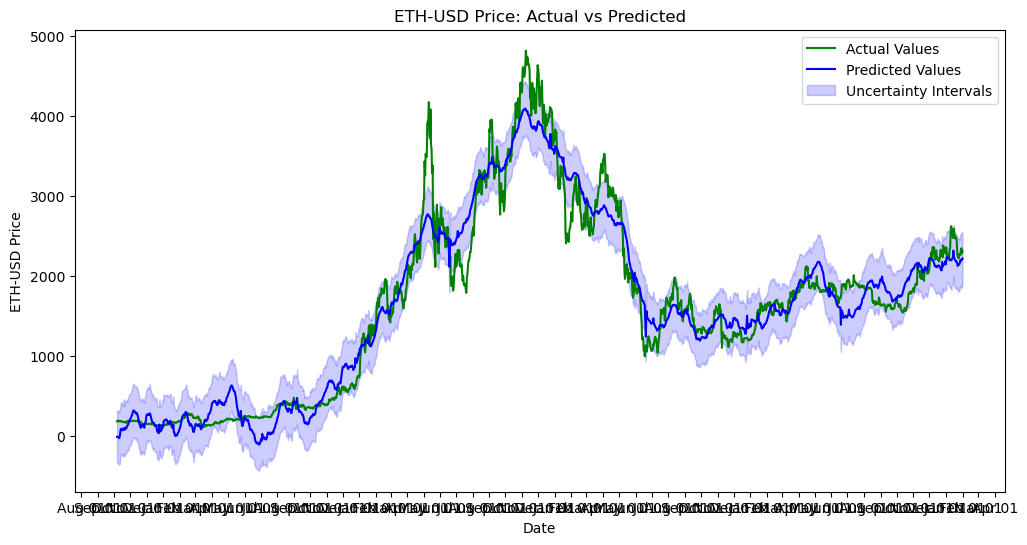

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.05,  # Adjust the flexibility of trend adjustment
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    daily_seasonality=False,  # Disable daily seasonality
    holidays_prior_scale=30,  # Increase the impact of holidays
    seasonality_prior_scale=20,  # Adjust the strength of seasonality
    seasonality_mode='additive'  # Additive seasonality (default)
)

# Add holidays
model.add_country_holidays(country_name='US')

# Add extra seasonality components
model.add_seasonality(name='monthly', period=30.5, fourier_order=10)  # Monthly seasonality
model.add_seasonality(name='quarterly', period=365.25 / 4, fourier_order=15)  # Quarterly seasonality

model.fit(df)

# Perform cross-validation
from prophet.diagnostics import cross_validation
cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calculate performance metrics
from prophet.diagnostics import performance_metrics
performance = performance_metrics(cv_results)

# Print performance metrics
print(performance)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
forecast = model.predict(df)
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()



19:39:21 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:23 - cmdstanpy - INFO - Chain [1] done processing
19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing
19:39:26 - cmdstanpy - INFO - Chain [1] start processing
19:39:27 - cmdstanpy - INFO - Chain [1] done processing


     horizon           mse         rmse          mae      mape     mdape  \
0    37 days  1.809072e+05   425.331909   392.292316  0.198643  0.189538   
1    38 days  1.855133e+05   430.712589   396.118935  0.201434  0.190277   
2    39 days  1.890742e+05   434.826665   399.465372  0.204260  0.199533   
3    40 days  1.934514e+05   439.831085   402.316688  0.207067  0.203882   
4    41 days  1.941607e+05   440.636716   402.039220  0.208654  0.203882   
..       ...           ...          ...          ...       ...       ...   
324 361 days  8.652544e+06  2941.520694  2688.861640  1.479860  1.288264   
325 362 days  8.617396e+06  2935.540228  2682.257401  1.471643  1.288264   
326 363 days  8.586729e+06  2930.312078  2676.845201  1.463530  1.160664   
327 364 days  8.550399e+06  2924.106596  2670.531944  1.455182  1.160664   
328 365 days  8.503745e+06  2916.118173  2662.601835  1.446880  1.160664   

        smape  coverage  
0    0.214209  0.391437  
1    0.218285  0.391437  
2    0.22

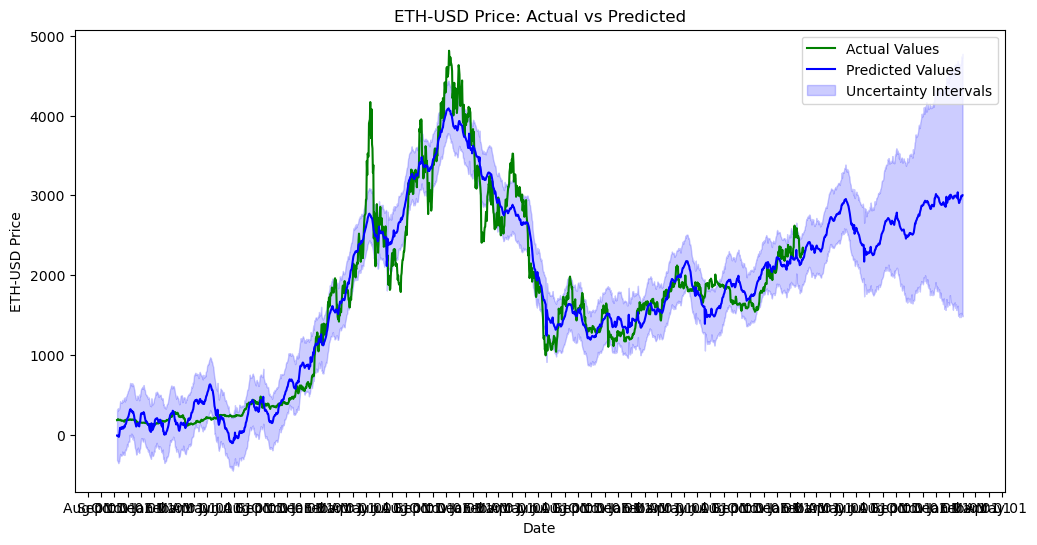

In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
from prophet.diagnostics import cross_validation, performance_metrics

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.05,  # Adjust the flexibility of trend adjustment
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    daily_seasonality=False,  # Disable daily seasonality
    holidays_prior_scale=30,  # Increase the impact of holidays
    seasonality_prior_scale=20,  # Adjust the strength of seasonality
    seasonality_mode='additive'  # Additive seasonality (default)
)

# Add holidays
model.add_country_holidays(country_name='US')

# Add extra seasonality components
model.add_seasonality(name='monthly', period=30.5, fourier_order=10)  # Monthly seasonality
model.add_seasonality(name='quarterly', period=365.25 / 4, fourier_order=15)  # Quarterly seasonality

# Fit the model to the entire dataset
model.fit(df)

# Perform cross-validation
cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calculate performance metrics
performance = performance_metrics(cv_results)

# Print performance metrics
print(performance)

# Make predictions for the future
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


17:45:01 - cmdstanpy - INFO - Chain [1] start processing
17:45:02 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

17:45:03 - cmdstanpy - INFO - Chain [1] start processing
17:45:03 - cmdstanpy - INFO - Chain [1] done processing
17:45:05 - cmdstanpy - INFO - Chain [1] start processing
17:45:05 - cmdstanpy - INFO - Chain [1] done processing
17:45:06 - cmdstanpy - INFO - Chain [1] start processing
17:45:07 - cmdstanpy - INFO - Chain [1] done processing


     horizon           mse         rmse          mae      mape     mdape  \
0    37 days  1.809072e+05   425.331909   392.292316  0.198643  0.189538   
1    38 days  1.855133e+05   430.712589   396.118935  0.201434  0.190277   
2    39 days  1.890742e+05   434.826665   399.465372  0.204260  0.199533   
3    40 days  1.934514e+05   439.831085   402.316688  0.207067  0.203882   
4    41 days  1.941607e+05   440.636716   402.039220  0.208654  0.203882   
..       ...           ...          ...          ...       ...       ...   
324 361 days  8.652544e+06  2941.520694  2688.861640  1.479860  1.288264   
325 362 days  8.617396e+06  2935.540228  2682.257401  1.471643  1.288264   
326 363 days  8.586729e+06  2930.312078  2676.845201  1.463530  1.160664   
327 364 days  8.550399e+06  2924.106596  2670.531944  1.455182  1.160664   
328 365 days  8.503745e+06  2916.118173  2662.601835  1.446880  1.160664   

        smape  coverage  
0    0.214209  0.409786  
1    0.218285  0.409786  
2    0.22

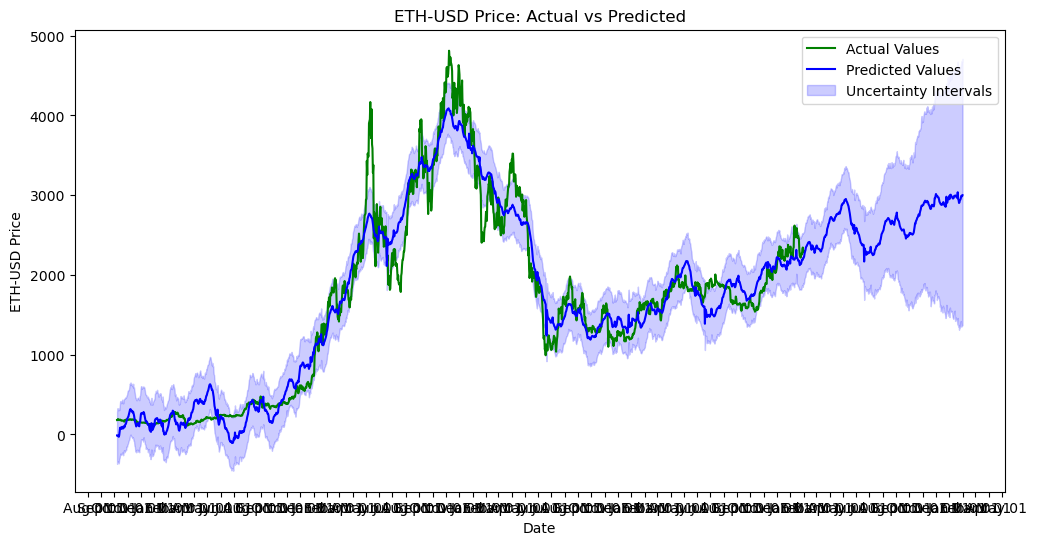

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
from prophet.diagnostics import cross_validation, performance_metrics

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.05,  # Adjust the flexibility of trend adjustment
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    daily_seasonality=False,  # Disable daily seasonality
    holidays_prior_scale=30,  # Increase the impact of holidays
    seasonality_prior_scale=20,  # Adjust the strength of seasonality
    seasonality_mode='additive'  # Additive seasonality (default)
)

# Add holidays
model.add_country_holidays(country_name='US')

# Add extra seasonality components
model.add_seasonality(name='monthly', period=30.5, fourier_order=10)  # Monthly seasonality
model.add_seasonality(name='quarterly', period=365.25 / 4, fourier_order=15)  # Quarterly seasonality

# Fit the model to the entire dataset
model.fit(df)

# Perform cross-validation
cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calculate performance metrics
performance = performance_metrics(cv_results)

# Print performance metrics
print(performance)

# Make predictions for the future
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


22:47:23 - cmdstanpy - INFO - Chain [1] start processing
22:47:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

22:47:24 - cmdstanpy - INFO - Chain [1] start processing
22:47:25 - cmdstanpy - INFO - Chain [1] done processing
22:47:25 - cmdstanpy - INFO - Chain [1] start processing
22:47:25 - cmdstanpy - INFO - Chain [1] done processing
22:47:26 - cmdstanpy - INFO - Chain [1] start processing
22:47:27 - cmdstanpy - INFO - Chain [1] done processing


     horizon           mse         rmse          mae      mape     mdape  \
0    37 days  1.811983e+05   425.673945   387.473048  0.194742  0.187528   
1    38 days  1.860140e+05   431.293417   391.230742  0.197447  0.189709   
2    39 days  1.895762e+05   435.403438   394.506046  0.200217  0.192424   
3    40 days  1.937967e+05   440.223477   397.280892  0.202976  0.197401   
4    41 days  1.941977e+05   440.678651   396.757105  0.204484  0.197401   
..       ...           ...          ...          ...       ...       ...   
324 361 days  8.614928e+06  2935.119718  2658.331673  1.465858  1.274190   
325 362 days  8.579904e+06  2929.147300  2651.647478  1.457678  1.274190   
326 363 days  8.549056e+06  2923.876924  2646.144166  1.449601  1.143423   
327 364 days  8.512725e+06  2917.657423  2639.748880  1.441284  1.143423   
328 365 days  8.466171e+06  2909.668467  2631.722334  1.432992  1.143423   

        smape  coverage  
0    0.209646  0.373089  
1    0.213679  0.373089  
2    0.21

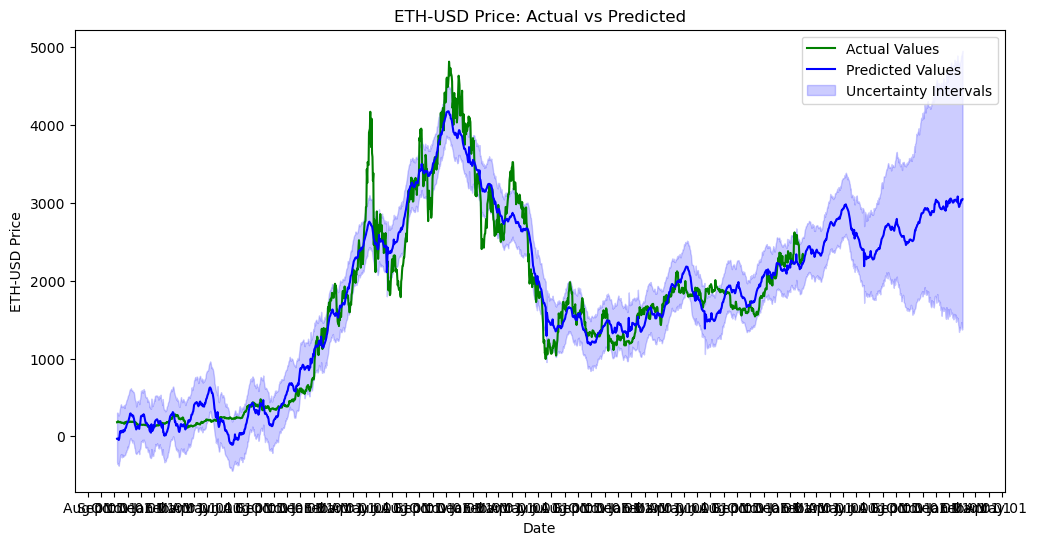

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
from prophet.diagnostics import cross_validation, performance_metrics

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
# Hyperparameter Tuning
model = Prophet(
    growth='linear',
    holidays_prior_scale=20,
    seasonality_prior_scale=10,
    changepoint_prior_scale=0.05,
    n_changepoints=25,  # Increase the number of changepoints
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=None  # Disable holiday effect for tuning
)



# Add holidays
model.add_country_holidays(country_name='US')

# Add extra seasonality components
model.add_seasonality(name='monthly', period=30.5, fourier_order=10)  # Monthly seasonality
model.add_seasonality(name='quarterly', period=365.25 / 4, fourier_order=15)  # Quarterly seasonality

# Fit the model to the entire dataset
model.fit(df)

# Perform cross-validation
cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calculate performance metrics
performance = performance_metrics(cv_results)

# Print performance metrics
print(performance)

# Make predictions for the future
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
from prophet.diagnostics import cross_validation, performance_metrics

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Load Bitcoin dataset for exogenous variable
btc_df = pd.read_csv("BTC-USD.csv")
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df.rename(columns={'Date': 'ds', 'Close': 'btc_price'}, inplace=True)

# Merge Bitcoin prices into Ethereum dataset
df = pd.merge(df, btc_df[['ds', 'btc_price']], on='ds', how='left')

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',
    holidays_prior_scale=10,
    seasonality_prior_scale=15,
    changepoint_prior_scale=0.1,
    n_changepoints=30,
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
)

# Add holidays
model.add_country_holidays(country_name='US')

# Add extra seasonality components
model.add_seasonality(name='monthly', period=30.5, fourier_order=10)
model.add_seasonality(name='quarterly', period=365.25 / 4, fourier_order=15)

# Add Bitcoin prices as an exogenous variable
model.add_regressor('btc_price')

# Fit the model to the entire dataset
model.fit(df)

# Perform cross-validation
cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calculate performance metrics
performance = performance_metrics(cv_results)

# Print performance metrics
print(performance)

# Make predictions for the future
future = model.make_future_dataframe(periods=365)
future = pd.merge(future, btc_df[['ds', 'btc_price']], on='ds', how='left')  # Merge Bitcoin prices into future dataframe
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


22:43:20 - cmdstanpy - INFO - Chain [1] start processing
22:43:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

22:43:23 - cmdstanpy - INFO - Chain [1] start processing
22:43:24 - cmdstanpy - INFO - Chain [1] done processing
22:43:25 - cmdstanpy - INFO - Chain [1] start processing
22:43:26 - cmdstanpy - INFO - Chain [1] done processing
22:43:27 - cmdstanpy - INFO - Chain [1] start processing
22:43:29 - cmdstanpy - INFO - Chain [1] done processing


     horizon            mse        rmse         mae      mape     mdape  \
0    37 days   96786.919918  311.105963  222.914567  0.096490  0.062803   
1    38 days  102427.196872  320.042492  228.553530  0.098364  0.063137   
2    39 days  109043.726303  330.217695  233.903630  0.100190  0.063137   
3    40 days  118361.148511  344.036551  240.916673  0.102458  0.063137   
4    41 days  128335.608337  358.239596  248.353443  0.104812  0.063137   
..       ...            ...         ...         ...       ...       ...   
324 361 days  782668.851896  884.685736  784.062650  0.399936  0.410022   
325 362 days  778967.046340  882.591098  780.157924  0.396385  0.399626   
326 363 days  773198.918820  879.317303  775.205467  0.392174  0.393542   
327 364 days  768863.602984  876.848677  770.457144  0.388006  0.386760   
328 365 days  765581.144500  874.974939  765.341956  0.383660  0.380642   

        smape  coverage  
0    0.104264  0.605505  
1    0.106590  0.596330  
2    0.108947  0.5932

ValueError: Found NaN in column 'btc_price'

22:38:40 - cmdstanpy - INFO - Chain [1] start processing
22:38:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

22:38:42 - cmdstanpy - INFO - Chain [1] start processing
22:38:42 - cmdstanpy - INFO - Chain [1] done processing
22:38:43 - cmdstanpy - INFO - Chain [1] start processing
22:38:44 - cmdstanpy - INFO - Chain [1] done processing
22:38:45 - cmdstanpy - INFO - Chain [1] start processing
22:38:45 - cmdstanpy - INFO - Chain [1] done processing


     horizon           mse         rmse          mae      mape     mdape  \
0    37 days  1.811983e+05   425.673945   387.473048  0.194742  0.187528   
1    38 days  1.860140e+05   431.293417   391.230742  0.197447  0.189709   
2    39 days  1.895762e+05   435.403438   394.506046  0.200217  0.192424   
3    40 days  1.937967e+05   440.223477   397.280892  0.202976  0.197401   
4    41 days  1.941977e+05   440.678651   396.757105  0.204484  0.197401   
..       ...           ...          ...          ...       ...       ...   
324 361 days  8.614928e+06  2935.119718  2658.331673  1.465858  1.274190   
325 362 days  8.579904e+06  2929.147300  2651.647478  1.457678  1.274190   
326 363 days  8.549056e+06  2923.876924  2646.144166  1.449601  1.143423   
327 364 days  8.512725e+06  2917.657423  2639.748880  1.441284  1.143423   
328 365 days  8.466171e+06  2909.668467  2631.722334  1.432992  1.143423   

        smape  coverage  
0    0.209646  0.400612  
1    0.213679  0.391437  
2    0.21

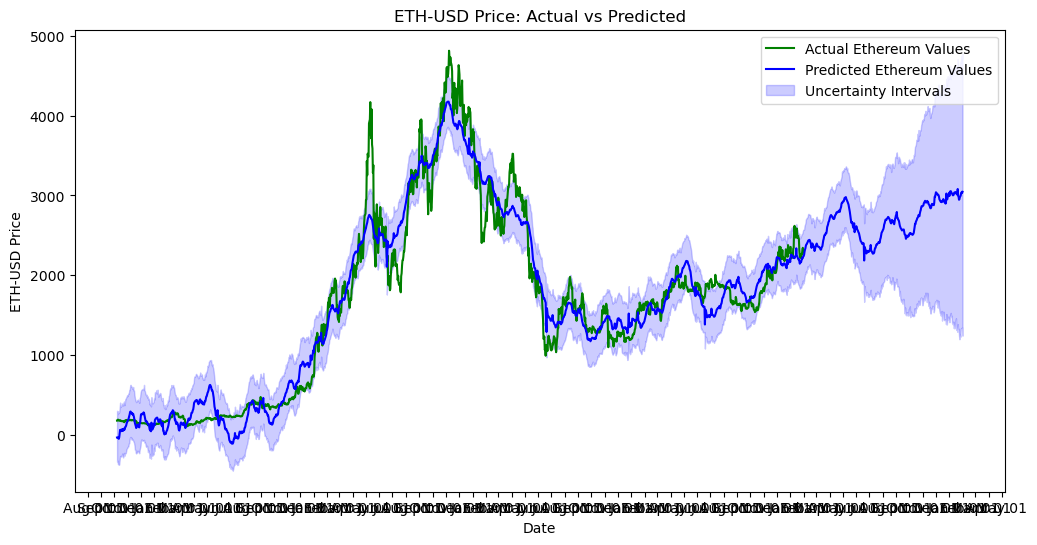

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
from prophet.diagnostics import cross_validation, performance_metrics

# Load the Ethereum dataset
eth_file_path = "ETH-USD.csv"
eth_df = pd.read_csv(eth_file_path)

# Convert 'Date' column to datetime
eth_df['Date'] = pd.to_datetime(eth_df['Date'])

# Rename columns to match Prophet's requirements
eth_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model for Ethereum
eth_model = Prophet(
    growth='linear',
    holidays_prior_scale=20,
    seasonality_prior_scale=10,
    changepoint_prior_scale=0.05,
    n_changepoints=25,  # Increase the number of changepoints
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=None  # Disable holiday effect for tuning
)

# Add holidays for Ethereum
eth_model.add_country_holidays(country_name='US')

# Add extra seasonality components for Ethereum
eth_model.add_seasonality(name='monthly', period=30.5, fourier_order=10)  # Monthly seasonality
eth_model.add_seasonality(name='quarterly', period=365.25 / 4, fourier_order=15)  # Quarterly seasonality

# Fit the Ethereum model to the entire dataset
eth_model.fit(eth_df)

# Perform cross-validation
cv_results = cross_validation(eth_model, initial='730 days', period='180 days', horizon='365 days')

# Calculate performance metrics
performance = performance_metrics(cv_results)

# Print performance metrics
print(performance)

# Make predictions for the future
future = eth_model.make_future_dataframe(periods=365)
forecast = eth_model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual Ethereum values
ax.plot(eth_df['ds'], eth_df['y'], color='green', label='Actual Ethereum Values')

# Plot predicted Ethereum values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Ethereum Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()
